# Install and Import Required Libraries
Install Gmsh and PyGmsh if not already installed, and import the necessary libraries.

In [1]:
import pygmsh
import matplotlib.pyplot as plt
import meshio
import numpy as np

# Define Geometry for Line Mesh
Use PyGmsh to define a simple line geometry, specifying the start and end points.

In [2]:
# Define Geometry
with pygmsh.occ.Geometry() as geom:
    # Set the characteristic length for the mesh
    geom.characteristic_length_max = 1

    # Define points for the line
    length=1000
    deg=30
    rad=deg*np.pi/180
    R = np.array([
        [np.cos(rad),-np.sin(rad)],
        [np.sin(rad),np.cos(rad)]
    ])
    p2_arr = R@np.array([length,0.0])

    p1 = geom.add_point([0.0, 0.0])  # Start point
    p2 = geom.add_point(p2_arr)  # End point
    
    # Create a line between the points
    line = geom.add_line(p1, p2)
    
    # Generate the mesh
    mesh = geom.generate_mesh(dim=2)
print(f'points shape = {mesh.points.shape}')

points shape = (1001, 3)


# Generate and Visualize the Mesh
Generate the mesh using PyGmsh and visualize it using matplotlib or another visualization library.

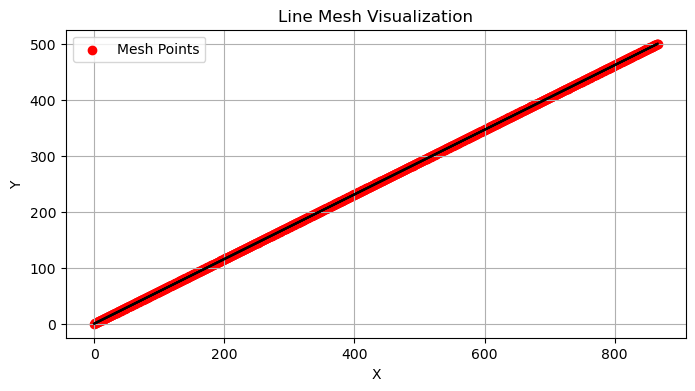

In [3]:
# Visualize the Mesh
# Extract points and cells for visualization
points = mesh.points
cells = mesh.cells_dict["line"]

# Plot the mesh
plt.figure(figsize=(8, 4))
for cell in cells:
    plt.plot(points[cell, 0], points[cell, 1], "k-")
plt.scatter(points[:, 0], points[:, 1], color="red", label="Mesh Points")
plt.title("Line Mesh Visualization")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()

# Export the Mesh to a File
Export the generated mesh to a file format such as .msh for further use.

In [4]:
output_file = "example_files/meshes/line_mesh_rotated.xdmf"
mesh.points = mesh.points[:,:2]
meshio.write_points_cells(
    output_file,
    points=mesh.points,
    cells={"line": mesh.cells_dict["line"]}
)
print(f"Mesh exported to {output_file}")

Mesh exported to example_files/meshes/line_mesh_rotated.xdmf
